In [113]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import tensorflow as tf

## Get data.

In [3]:
import json

with open("instances_train2014.json") as f:
    data = json.load(f)

In [6]:
data.keys()

dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])

## Images.

In [9]:
len(data["images"])

82783

In [15]:
data["images"][0:5]

[{'license': 5,
  'file_name': 'COCO_train2014_000000057870.jpg',
  'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000057870.jpg',
  'height': 480,
  'width': 640,
  'date_captured': '2013-11-14 16:28:13',
  'flickr_url': 'http://farm4.staticflickr.com/3153/2970773875_164f0c0b83_z.jpg',
  'id': 57870},
 {'license': 5,
  'file_name': 'COCO_train2014_000000384029.jpg',
  'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000384029.jpg',
  'height': 429,
  'width': 640,
  'date_captured': '2013-11-14 16:29:45',
  'flickr_url': 'http://farm3.staticflickr.com/2422/3577229611_3a3235458a_z.jpg',
  'id': 384029},
 {'license': 1,
  'file_name': 'COCO_train2014_000000222016.jpg',
  'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000222016.jpg',
  'height': 640,
  'width': 480,
  'date_captured': '2013-11-14 16:37:59',
  'flickr_url': 'http://farm2.staticflickr.com/1431/1118526611_09172475e5_z.jpg',
  'id': 222016},
 {'license': 3

In [26]:
image_dict = {}
for image in data["images"]:
    image_dict[image["id"]] = {"filename": image["file_name"]}

In [27]:
image_dict[69675]

{'filename': 'COCO_train2014_000000069675.jpg'}

## Annotations.

In [13]:
len(data["annotations"])

604907

In [28]:
data["annotations"][0:2]

[{'segmentation': [[312.29,
    562.89,
    402.25,
    511.49,
    400.96,
    425.38,
    398.39,
    372.69,
    388.11,
    332.85,
    318.71,
    325.14,
    295.58,
    305.86,
    269.88,
    314.86,
    258.31,
    337.99,
    217.19,
    321.29,
    182.49,
    343.13,
    141.37,
    348.27,
    132.37,
    358.55,
    159.36,
    377.83,
    116.95,
    421.53,
    167.07,
    499.92,
    232.61,
    560.32,
    300.72,
    571.89]],
  'area': 54652.9556,
  'iscrowd': 0,
  'image_id': 480023,
  'bbox': [116.95, 305.86, 285.3, 266.03],
  'category_id': 58,
  'id': 86},
 {'segmentation': [[252.46,
    208.17,
    267.96,
    210.11,
    280.14,
    213.98,
    285.68,
    221.45,
    279.59,
    227.27,
    270.73,
    223.12,
    256.61,
    218.69,
    253.02,
    217.3,
    248.03,
    220.07,
    245.54,
    215.92,
    245.82,
    209.55,
    249.69,
    208.45]],
  'area': 421.47274999999996,
  'iscrowd': 0,
  'image_id': 50518,
  'bbox': [245.54, 208.17, 40.14, 19.1],


In [29]:
for annotation in data["annotations"]:
    if image_dict[annotation["image_id"]].get("annotations"):
        image_dict[annotation["image_id"]]["annotations"].append({"bbox": annotation["bbox"], "category_id": annotation["category_id"]})
    else:
        image_dict[annotation["image_id"]]["annotations"] = [{"bbox": annotation["bbox"], "category_id": annotation["category_id"]}]

In [30]:
image_dict[69675]

{'filename': 'COCO_train2014_000000069675.jpg',
 'annotations': [{'bbox': [598.41, 245.98, 38.77, 47.03], 'category_id': 47},
  {'bbox': [489.4, 157.12, 49.3, 63.74], 'category_id': 80},
  {'bbox': [111.1, 64.72, 217.89, 409.89], 'category_id': 1},
  {'bbox': [578.46, 224.83, 33.0, 50.58], 'category_id': 46},
  {'bbox': [309.57, 44.22, 255.64, 429.31], 'category_id': 1},
  {'bbox': [615.76, 213.34, 24.24, 42.6], 'category_id': 46},
  {'bbox': [0.0, 153.14, 180.78, 321.67], 'category_id': 79},
  {'bbox': [41.64, 304.47, 57.6, 25.81], 'category_id': 50}]}

## Expand annotations.

In [67]:
for key, image in image_dict.items():
    if image.get("annotations"):
        image_dict[key]["xs"] = [
            str(anno["bbox"][0]) for anno in image["annotations"]
        ]
        image_dict[key]["ys"] = [
            str(anno["bbox"][1]) for anno in image["annotations"]
        ]
        image_dict[key]["widths"] = [
            str(anno["bbox"][2]) for anno in image["annotations"]
        ]
        image_dict[key]["heights"] = [
            str(anno["bbox"][3]) for anno in image["annotations"]
        ]
        image_dict[key]["category_ids"] = [
            str(anno["category_id"]) for anno in image["annotations"]
        ]

In [68]:
image_dict[69675]

{'filename': 'COCO_train2014_000000069675.jpg',
 'annotations': [{'bbox': [598.41, 245.98, 38.77, 47.03], 'category_id': 47},
  {'bbox': [489.4, 157.12, 49.3, 63.74], 'category_id': 80},
  {'bbox': [111.1, 64.72, 217.89, 409.89], 'category_id': 1},
  {'bbox': [578.46, 224.83, 33.0, 50.58], 'category_id': 46},
  {'bbox': [309.57, 44.22, 255.64, 429.31], 'category_id': 1},
  {'bbox': [615.76, 213.34, 24.24, 42.6], 'category_id': 46},
  {'bbox': [0.0, 153.14, 180.78, 321.67], 'category_id': 79},
  {'bbox': [41.64, 304.47, 57.6, 25.81], 'category_id': 50}],
 'xs': ['598.41',
  '489.4',
  '111.1',
  '578.46',
  '309.57',
  '615.76',
  '0.0',
  '41.64'],
 'ys': ['245.98',
  '157.12',
  '64.72',
  '224.83',
  '44.22',
  '213.34',
  '153.14',
  '304.47'],
 'widths': ['38.77',
  '49.3',
  '217.89',
  '33.0',
  '255.64',
  '24.24',
  '180.78',
  '57.6'],
 'heights': ['47.03',
  '63.74',
  '409.89',
  '50.58',
  '429.31',
  '42.6',
  '321.67',
  '25.81'],
 'category_ids': ['47', '80', '1', '46', 

In [69]:
import csv
with open("coco.csv", "w") as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
        
    for image in image_dict.values():
        filename = image["filename"]
        if image.get("annotations"):
            xs = ";".join(image["xs"])
            ys = ";".join(image["ys"])
            widths = ";".join(image["widths"])
            heights = ";".join(image["heights"])
            csvline = [filename, xs, ys, widths, heights]
            csvwriter.writerow(csvline)

In [70]:
!head -5 coco.csv

COCO_train2014_000000057870.jpg,233.29;1.02;476.76;10.79;367.82;539.33;364.4;152.17;1.08;298.2;285.8;20.54;263.03;560.8;296.78;292.8;90.67,270.45;279.96;261.03;260.03;264.27;290.16;256.57;256.67;373.21;235.17;257.46;376.76;174.37;413.95;277.79;289.31;271.49,170.32;533.09;119.73;114.33;139.15;100.67;52.66;78.41;31.28;83.01;13.97;83.24;154.64;78.29;32.48;21.41;171.84,203.36;200.04;201.71;124.04;215.73;179.05;26.64;29.11;106.79;34.08;16.14;55.13;125.03;65.25;11.99;11.34;208.51
COCO_train2014_000000384029.jpg,4.82;312.35;452.63;509.23;588.34;583.0;482.16;555.87;446.02;292.06;538.37;436.8;198.8;30.72,2.89;229.44;149.54;8.91;12.26;0.0;107.08;228.05;151.78;235.43;147.6;228.43;272.61;230.92,478.17;158.1;104.49;88.03;51.66;57.0;105.63;57.13;29.98;52.56;75.9;189.43;147.03;166.3,302.71;126.29;133.02;79.12;76.88;16.31;54.37;70.87;53.39;37.37;80.99;133.71;67.63;121.81
COCO_train2014_000000222016.jpg,225.29,185.04,126.28,411.84
COCO_train2014_000000520950.jpg,381.45;234.49;50.97;480.99;482.42;496.85

## Write CSVs.

In [81]:
def write_coco_csv(json_file, gcs_path, output_file):
    """Writes COCO CSV files.

    Args:
        json_file: str, name of annotation json file.
        gcs_path: str, GCS path to image files.
        output_file: str, name of output file.
    """
    import csv
    import json

    # Read data from json.
    with open(json_file) as f:
        data = json.load(f)

    # Put image filenames in dict.
    image_dict = {}
    for image in data["images"]:
        image_dict[image["id"]] = {"filename": image["file_name"]}

    # Add annotations to dict.
    for annotation in data["annotations"]:
        if image_dict[annotation["image_id"]].get("annotations"):
            image_dict[annotation["image_id"]]["annotations"].append(
                {
                    "bbox": annotation["bbox"],
                    "category_id": annotation["category_id"]
                }
            )
        else:
            image_dict[annotation["image_id"]]["annotations"] = [
                {
                    "bbox": annotation["bbox"],
                    "category_id": annotation["category_id"]
                }
            ]

    # Expand annotations in dict.
    for key, image in image_dict.items():
        if image.get("annotations"):
            image_dict[key]["xs"] = [
                str(anno["bbox"][0]) for anno in image["annotations"]
            ]
            image_dict[key]["ys"] = [
                str(anno["bbox"][1]) for anno in image["annotations"]
            ]
            image_dict[key]["widths"] = [
                str(anno["bbox"][2]) for anno in image["annotations"]
            ]
            image_dict[key]["heights"] = [
                str(anno["bbox"][3]) for anno in image["annotations"]
            ]
            image_dict[key]["category_ids"] = [
                str(anno["category_id"]) for anno in image["annotations"]
            ]

    # Write to csv
    with open(output_file, "w") as csvfile:  
        # creating a csv writer object  
        csvwriter = csv.writer(csvfile)  

        for image in image_dict.values():
            filename = gcs_path + image["filename"]
            if image.get("annotations"):
                xs = ";".join(image["xs"])
                ys = ";".join(image["ys"])
                widths = ";".join(image["widths"])
                heights = ";".join(image["heights"])
                csvline = [filename, xs, ys, widths, heights]
                csvwriter.writerow(csvline)


In [85]:
# Train.
write_coco_csv(
    json_file="instances_train2014.json",
    gcs_path="gs://machine-learning-1234-bucket/coco/train2014/",
    output_file="coco_train.csv"
)

# Validation.
write_coco_csv(
    json_file="instances_val2014.json",
    gcs_path="gs://machine-learning-1234-bucket/coco/val2014/",
    output_file="coco_val.csv"
)

In [86]:
!head -5 coco_train.csv

gs://machine-learning-1234-bucket/coco/train2014/COCO_train2014_000000057870.jpg,233.29;1.02;476.76;10.79;367.82;539.33;364.4;152.17;1.08;298.2;285.8;20.54;263.03;560.8;296.78;292.8;90.67,270.45;279.96;261.03;260.03;264.27;290.16;256.57;256.67;373.21;235.17;257.46;376.76;174.37;413.95;277.79;289.31;271.49,170.32;533.09;119.73;114.33;139.15;100.67;52.66;78.41;31.28;83.01;13.97;83.24;154.64;78.29;32.48;21.41;171.84,203.36;200.04;201.71;124.04;215.73;179.05;26.64;29.11;106.79;34.08;16.14;55.13;125.03;65.25;11.99;11.34;208.51
gs://machine-learning-1234-bucket/coco/train2014/COCO_train2014_000000384029.jpg,4.82;312.35;452.63;509.23;588.34;583.0;482.16;555.87;446.02;292.06;538.37;436.8;198.8;30.72,2.89;229.44;149.54;8.91;12.26;0.0;107.08;228.05;151.78;235.43;147.6;228.43;272.61;230.92,478.17;158.1;104.49;88.03;51.66;57.0;105.63;57.13;29.98;52.56;75.9;189.43;147.03;166.3,302.71;126.29;133.02;79.12;76.88;16.31;54.37;70.87;53.39;37.37;80.99;133.71;67.63;121.81
gs://machine-learning-1234-bucket/

In [87]:
!head -5 coco_val.csv

gs://machine-learning-1234-bucket/coco/val2014/COCO_val2014_000000391895.jpg,359.17;339.88;471.64;486.01,146.17;22.16;172.82;183.31,112.45;153.88;35.92;30.63,213.57;300.73;48.1;34.98
gs://machine-learning-1234-bucket/coco/val2014/COCO_val2014_000000522418.jpg,382.48;234.06;0.0;305.45,0.0;406.61;316.04;172.05,256.8;219.94;406.65;57.36,474.31;42.67;157.49;77.3
gs://machine-learning-1234-bucket/coco/val2014/COCO_val2014_000000184613.jpg,239.9;285.08;452.49;296.96;461.07;103.44;65.33;146.48;8.29;45.24;20.71;0.75;343.28;362.05;382.76;413.61;314.34;288.04;272.72;8.93;271.13;257.75;255.71;0,111.16;85.99;85.93;68.01;75.92;31.01;59.84;65.69;57.26;48.41;44.87;76.59;63.97;66.51;60.79;61.01;57.09;57.1;56.58;48.6;87.59;80.2;132.65;35,128.62;170.23;47.51;22.39;34.46;154.79;20.64;160.83;75.33;45.97;44.28;36.16;18.96;17.44;12.82;11.92;13.69;9.76;6.37;9.17;78.09;29.67;237.38;481,99.71;64.48;22.82;21.06;14.19;135.15;12.31;246.9;146.9;125.55;50.36;105.47;28.73;24.78;32.54;27.2;31.73;29.71;30.54;10.69;23.

## Write TF Records.

In [78]:
import os
PROJECT = "machine-learning-1234"
BUCKET = "machine-learning-1234-bucket"
REGION = "us-central1"

# Import os environment variables
os.environ["PROJECT"] = PROJECT
os.environ["BUCKET"] =  BUCKET
os.environ["REGION"] = REGION
os.environ["TFVERSION"] = "1.15"
os.environ["PYTHON_VERSION"] = "3.5"

In [98]:
arguments = {}
# Image parameters
arguments["height"] = 1024
arguments["width"] = 1024
arguments["depth"] = 3

In [ ]:
%%bash
gsutil -m cp coco_*.csv gs://${BUCKET}/coco

## Write

In [ ]:
%%bash
python3 coco_jpeg_to_tfrecord.py \
    --train_csv=gs://${BUCKET}/coco/coco_train.csv \
    --validation_csv=gs://${BUCKET}/coco/coco_val.csv \
    --project_id=${PROJECT} \
    --output_dir=gs://${BUCKET}/gan/data/coco

## Read

In [92]:
def print_obj(function_name, object_name, object_value):
    """Prints enclosing function, object name, and object value.

    Args:
        function_name: str, name of function.
        object_name: str, name of object.
        object_value: object, value of passed object.
    """
#     pass
    print("{}: {} = {}".format(function_name, object_name, object_value))

In [139]:
def decode_example(protos, params):
    """Decodes TFRecord file into tensors.

    Given protobufs, decode into image and label tensors.

    Args:
        protos: protobufs from TFRecord file.
        params: dict, user passed parameters.

    Returns:
        Image and label tensors.
    """
    func_name = "decode_example"
    # Create feature schema map for protos.
    features = {
        "image_raw": tf.FixedLenFeature(shape=[], dtype=tf.string),
        "bb_ymin": tf.VarLenFeature(dtype=tf.float32),
        "bb_xmin": tf.VarLenFeature(dtype=tf.float32),
        "bb_ymax": tf.VarLenFeature(dtype=tf.float32),
        "bb_xmax": tf.VarLenFeature(dtype=tf.float32)
    }

    # Parse features from tf.Example.
    parsed_features = tf.parse_single_example(
        serialized=protos, features=features
    )
    print_obj("\n" + func_name, "features", features)

    # Convert from a scalar string tensor (whose single string has
    # length height * width * depth) to a uint8 tensor with shape
    # [height * width * depth].
    image = tf.image.decode_jpeg(
        contents=parsed_features["image_raw"], channels=3
    )
    print_obj(func_name, "image", image)

    # Add to features dictionary.
    features = {}
    features["image"] = image

    features["bb_ymin"] = tf.sparse.to_dense(
        sp_input=parsed_features["bb_ymin"], default_value=0.0
    )
    features["bb_xmin"] = tf.sparse.to_dense(
        sp_input=parsed_features["bb_xmin"], default_value=0.0
    )
    features["bb_ymax"] = tf.sparse.to_dense(
        sp_input=parsed_features["bb_ymax"], default_value=0.0
    )
    features["bb_xmax"] = tf.sparse.to_dense(
        sp_input=parsed_features["bb_xmax"], default_value=0.0
    )

    return features


def read_dataset(filename, mode, batch_size, params):
    """Reads CSV time series data using tf.data, doing necessary preprocessing.

    Given filename, mode, batch size, and other parameters, read CSV dataset
    using Dataset API, apply necessary preprocessing, and return an input
    function to the Estimator API.

    Args:
        filename: str, file pattern that to read into our tf.data dataset.
        mode: The estimator ModeKeys. Can be TRAIN or EVAL.
        batch_size: int, number of examples per batch.
        params: dict, dictionary of user passed parameters.

    Returns:
        An input function.
    """
    def _input_fn():
        """Wrapper input function used by Estimator API to get data tensors.

        Returns:
            Batched dataset object of dictionary of feature tensors and label
                tensor.
        """
        # Create list of files that match pattern.
        file_list = tf.gfile.Glob(filename=filename)

        # Create dataset from file list.
        dataset = tf.data.TFRecordDataset(
            filenames=file_list,
            num_parallel_reads=tf.data.experimental.AUTOTUNE
        )

        # Shuffle and repeat if training with fused op.
        if mode == tf.estimator.ModeKeys.TRAIN:
            dataset = dataset.apply(
                tf.contrib.data.shuffle_and_repeat(
                    buffer_size=50 * batch_size,
                    count=None  # indefinitely
                )
            )

        # Decode CSV file into a features dictionary of tensors, then batch.
        dataset = dataset.apply(
            tf.contrib.data.map_and_batch(
                map_func=lambda x: decode_example(
                    protos=x,
                    params=params
                ),
                batch_size=batch_size,
                num_parallel_calls=tf.data.experimental.AUTOTUNE
            )
        )

        # Prefetch data to improve latency.
        dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

        # Create a iterator, then get batch of features from example queue.
        batched_dataset = dataset.make_one_shot_iterator().get_next()

        return batched_dataset
    return _input_fn


In [95]:
def try_out_input_function(arguments, print_features=False):
    """Trys out input function for testing purposes.

    Args:
        arguments: dict, user passed parameters.
        print_out: bool, whether to print features or not.
    Returns:
        Dictionary of feature arrays and array of labels.
    """
    with tf.Session() as sess:
        fn = read_dataset(
            filename=arguments["filename"],
            mode=tf.estimator.ModeKeys.EVAL,
            batch_size=1,
            params=arguments
        )

        features = sess.run(fetches=fn())
        print("features[image].shape = {}".format(features["image"].shape))
        if print_features:
            print("features = \n{}".format(features))

    return features


In [161]:
def plot_images(images, bb_ymin, bb_xmin, bb_ymax, bb_xmax):
    """Plots images with bounding boxes.

    Args:
        images: np.array, array of images of
            [num_images, image_height, image_width, num_channels].
        bb_ymin: np.array, array of bounding box minimum y coordinates of
            shape [num_bounding_boxes,].
        bb_xmin: np.array, array of bounding box minimum x coordinates of
            shape [num_bounding_boxes,].
        bb_ymax: np.array, array of bounding box maximum y coordinates of
            shape [num_bounding_boxes,].
        bb_xmax: np.array, array of bounding box maximum x coordinates of
            shape [num_bounding_boxes,].
    """
    num_images = len(images)

    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        fig = plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)

        # Get the current reference
        ax = plt.gca()

        for i in range(len(bb_ymin)):
            x = bb_xmin[i]
            y = bb_ymin[i]
            width = bb_xmax[i] - bb_xmin[i]
            height = bb_ymax[i] - bb_ymin[i]

            # Create a Rectangle patch
            rect = patches.Rectangle(
                xy=(x, y),
                width=width,
                height=height,
                linewidth=1,
                edgecolor="r",
                facecolor="none"
            )

            # Add the patch to the Axes
            ax.add_patch(rect)
    plt.show()



decode_example: features = {'image_raw': FixedLenFeature(shape=[], dtype=tf.string, default_value=None), 'bb_ymin': VarLenFeature(dtype=tf.float32), 'bb_xmin': VarLenFeature(dtype=tf.float32), 'bb_ymax': VarLenFeature(dtype=tf.float32), 'bb_xmax': VarLenFeature(dtype=tf.float32)}
decode_example: image = Tensor("DecodeJpeg:0", shape=(?, ?, 3), dtype=uint8)
features[image].shape = (1, 433, 640, 3)
54.49 111.9 440.78 165.41
559.29 243.34 80.71002 18.610016


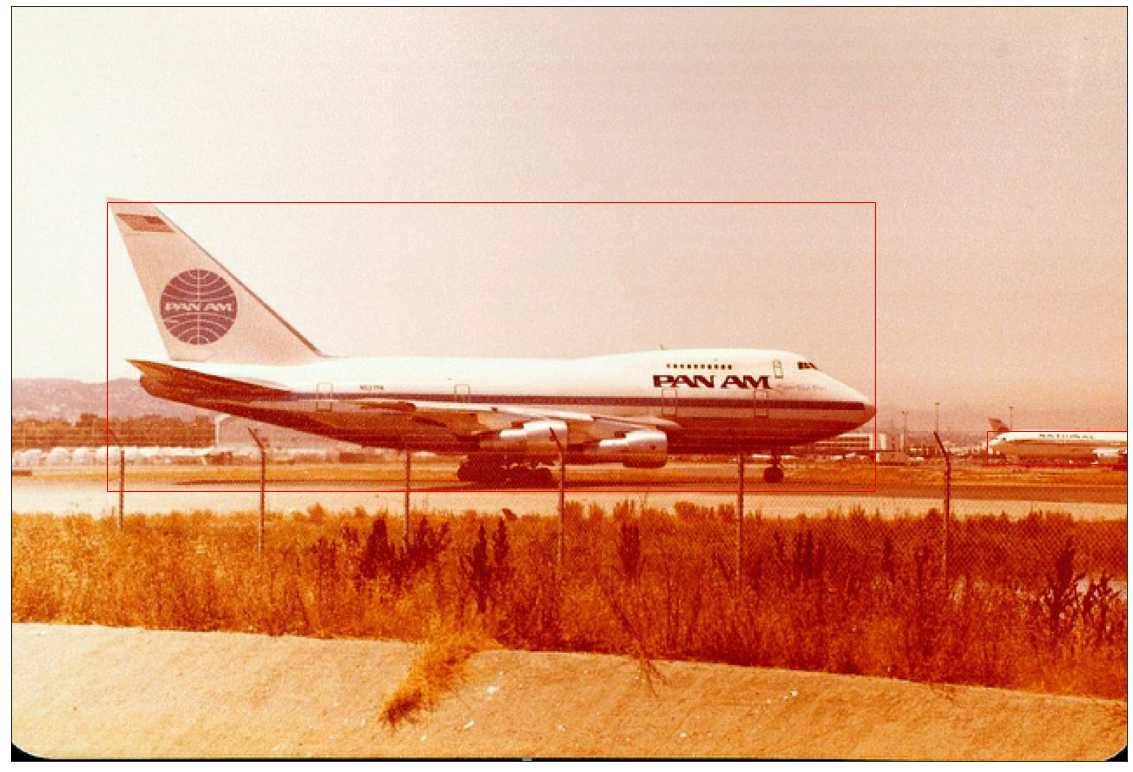

In [172]:
arguments["filename"] = "gs://machine-learning-1234-bucket/gan/data/coco/train-00015-of-00165"
features = try_out_input_function(arguments, print_features=False)
plot_images(
    images=features["image"],
    bb_ymin=features["bb_ymin"].flatten(),
    bb_xmin=features["bb_xmin"].flatten(),
    bb_ymax=features["bb_ymax"].flatten(),
    bb_xmax=features["bb_xmax"].flatten()
)


decode_example: features = {'image_raw': FixedLenFeature(shape=[], dtype=tf.string, default_value=None), 'bb_ymin': VarLenFeature(dtype=tf.float32), 'bb_xmin': VarLenFeature(dtype=tf.float32), 'bb_ymax': VarLenFeature(dtype=tf.float32), 'bb_xmax': VarLenFeature(dtype=tf.float32)}
decode_example: image = Tensor("DecodeJpeg:0", shape=(?, ?, 3), dtype=uint8)
features[image].shape = (1, 425, 640, 3)
279.25 60.83 27.369995 25.720001
249.11 36.22 234.84001 383.17
370.31 155.8 92.640015 69.72


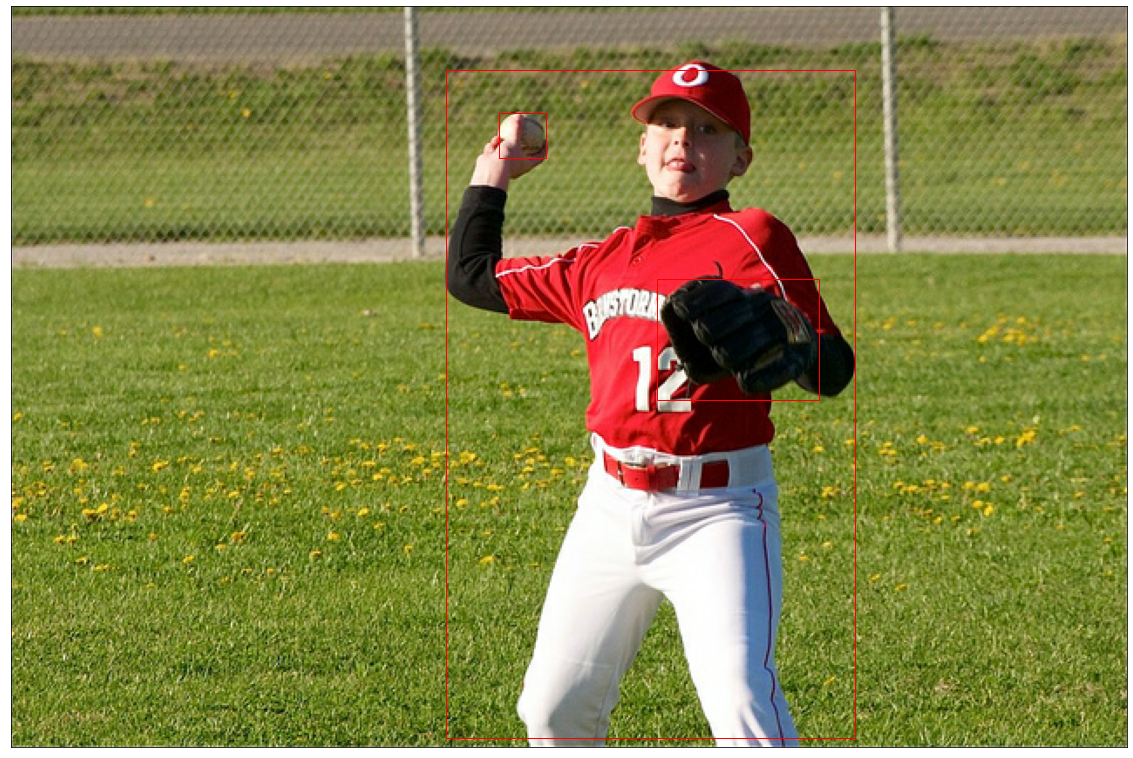

In [173]:
arguments["filename"] = "gs://machine-learning-1234-bucket/gan/data/coco/train-00001-of-00165"
features = try_out_input_function(arguments, print_features=False)
plot_images(
    images=features["image"],
    bb_ymin=features["bb_ymin"].flatten(),
    bb_xmin=features["bb_xmin"].flatten(),
    bb_ymax=features["bb_ymax"].flatten(),
    bb_xmax=features["bb_xmax"].flatten()
)